## Problem Statement 

`To build an application to classify the patients to be healthy or suffering from cardiovascular disease based on the given attributes.`

In [1]:
#Important libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing,Normalizing 
from sklearn.preprocessing import StandardScaler

#For multicollinearity
from statsmodels.stats.outliers_influence import  variance_inflation_factor

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import  RandomForestClassifier

#Metrics
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import plot_roc_curve

import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

In [2]:
df = pd.read_csv('cardio_train.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [3]:
# Dataset stats
print ('Shape of Data set= >', df.shape[0],'Rows', df.shape[1], 'Columns')

Shape of Data set= > 69301 Rows 13 Columns


In [4]:
#Check data types
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [5]:
# All are int and float types.  Understand the stats of dataframe
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Observations
#1 - No Missing values
#2 - Assuming Age is in number of days
#3 - Outliers in height
#4 - Outliers in Systolic blood pressure - ap_high
#5 - Outliers in ap_low
#6 - Seems Cholestrol and glucose are binary. will see in the further analysis

In [7]:
# Drop Id and remove duplicates
df.drop('id',axis=1,inplace=True)

#Duplicate removal
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(69277, 12)

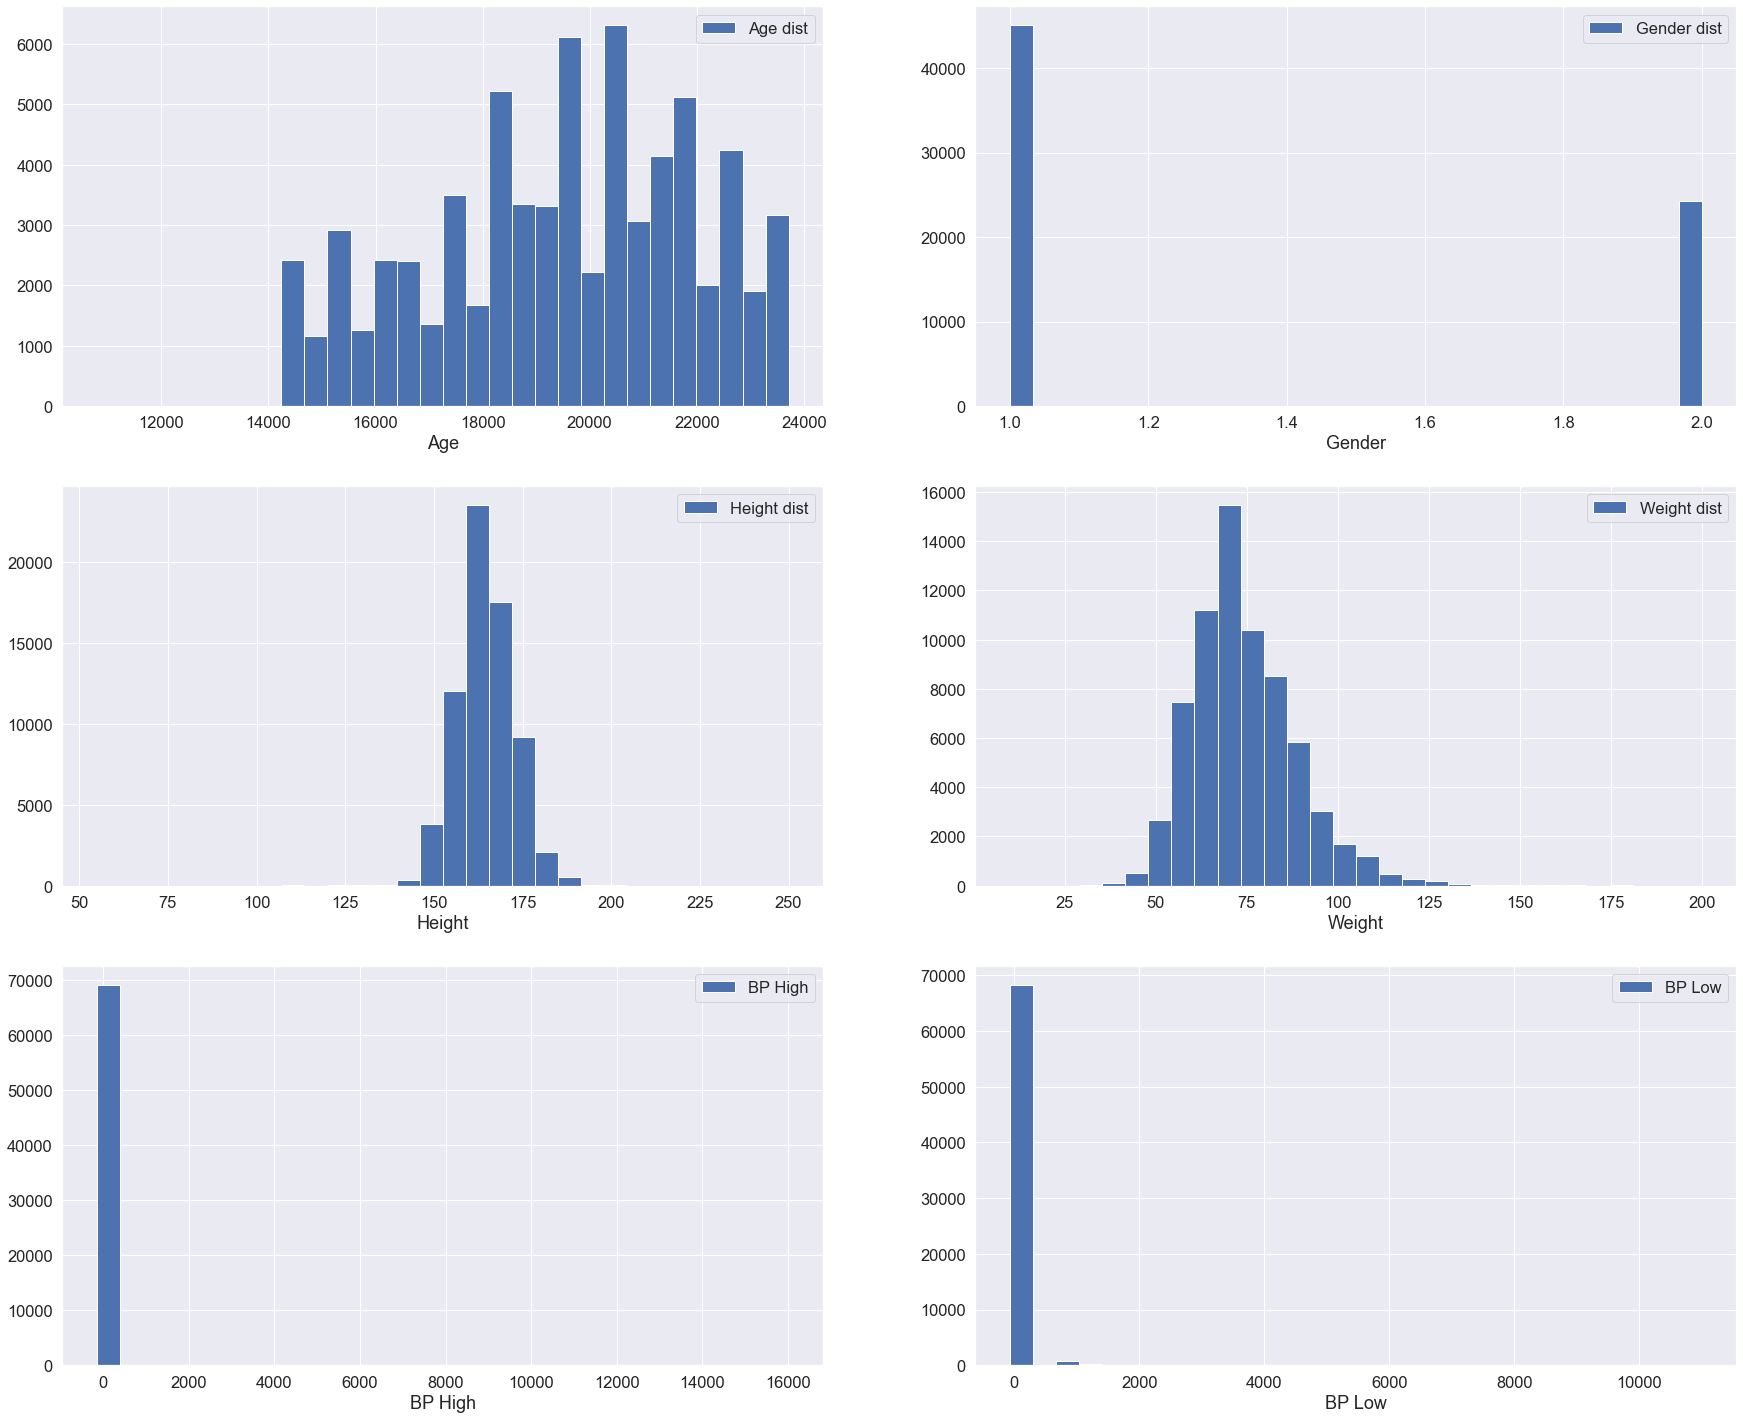

In [9]:
fig = plt.figure(figsize=(30,25))
sns.set(font_scale=1.5)

fig1 = fig.add_subplot(321)
plt.hist(df['age'],label='Age dist',bins=30)
plt.legend()
plt.xlabel('Age')

fig2 = fig.add_subplot(322)
plt.hist(df['gender'],label='Gender dist',bins=30)
plt.legend()
plt.xlabel('Gender')

fig3 = fig.add_subplot(323)
plt.hist(df['height'],label='Height dist',bins=30)
plt.legend()
plt.xlabel('Height')

fig4 = fig.add_subplot(324)
plt.hist(df['weight'],label='Weight dist',bins=30)
plt.legend()
plt.xlabel('Weight')

fig5 = fig.add_subplot(325)
plt.hist(df['ap_hi'],label='BP High',bins=30)
plt.legend()
plt.xlabel('BP High')

fig6 = fig.add_subplot(326)
plt.hist(df['ap_lo'],label='BP Low',bins=30)
plt.legend()
plt.xlabel('BP Low')


plt.show()

In [10]:
# Based on business logic We will eliminate out of range values in each feature (if any)

#1 -Age  (Age below 14000)
df.drop(df[df['age'] < 14000].index,inplace=True)

#2 - Height (<125 and > 200)
df.drop(df[df['height'] < 125].index,inplace=True)
df.drop(df[df['height'] > 200].index,inplace=True)

#3 - BP High (>180) & < 50
df.drop(df[df['ap_hi'] > 180].index,inplace=True)
df.drop(df[df['ap_hi'] < 50].index,inplace=True)

#4 BP - low (> 150) & < 25
df.drop(df[df['ap_lo'] > 150].index,inplace=True)
df.drop(df[df['ap_lo'] < 25].index,inplace=True)

#5 - Weight (<30)
df.drop(df[df['weight'] < 30].index,inplace=True)

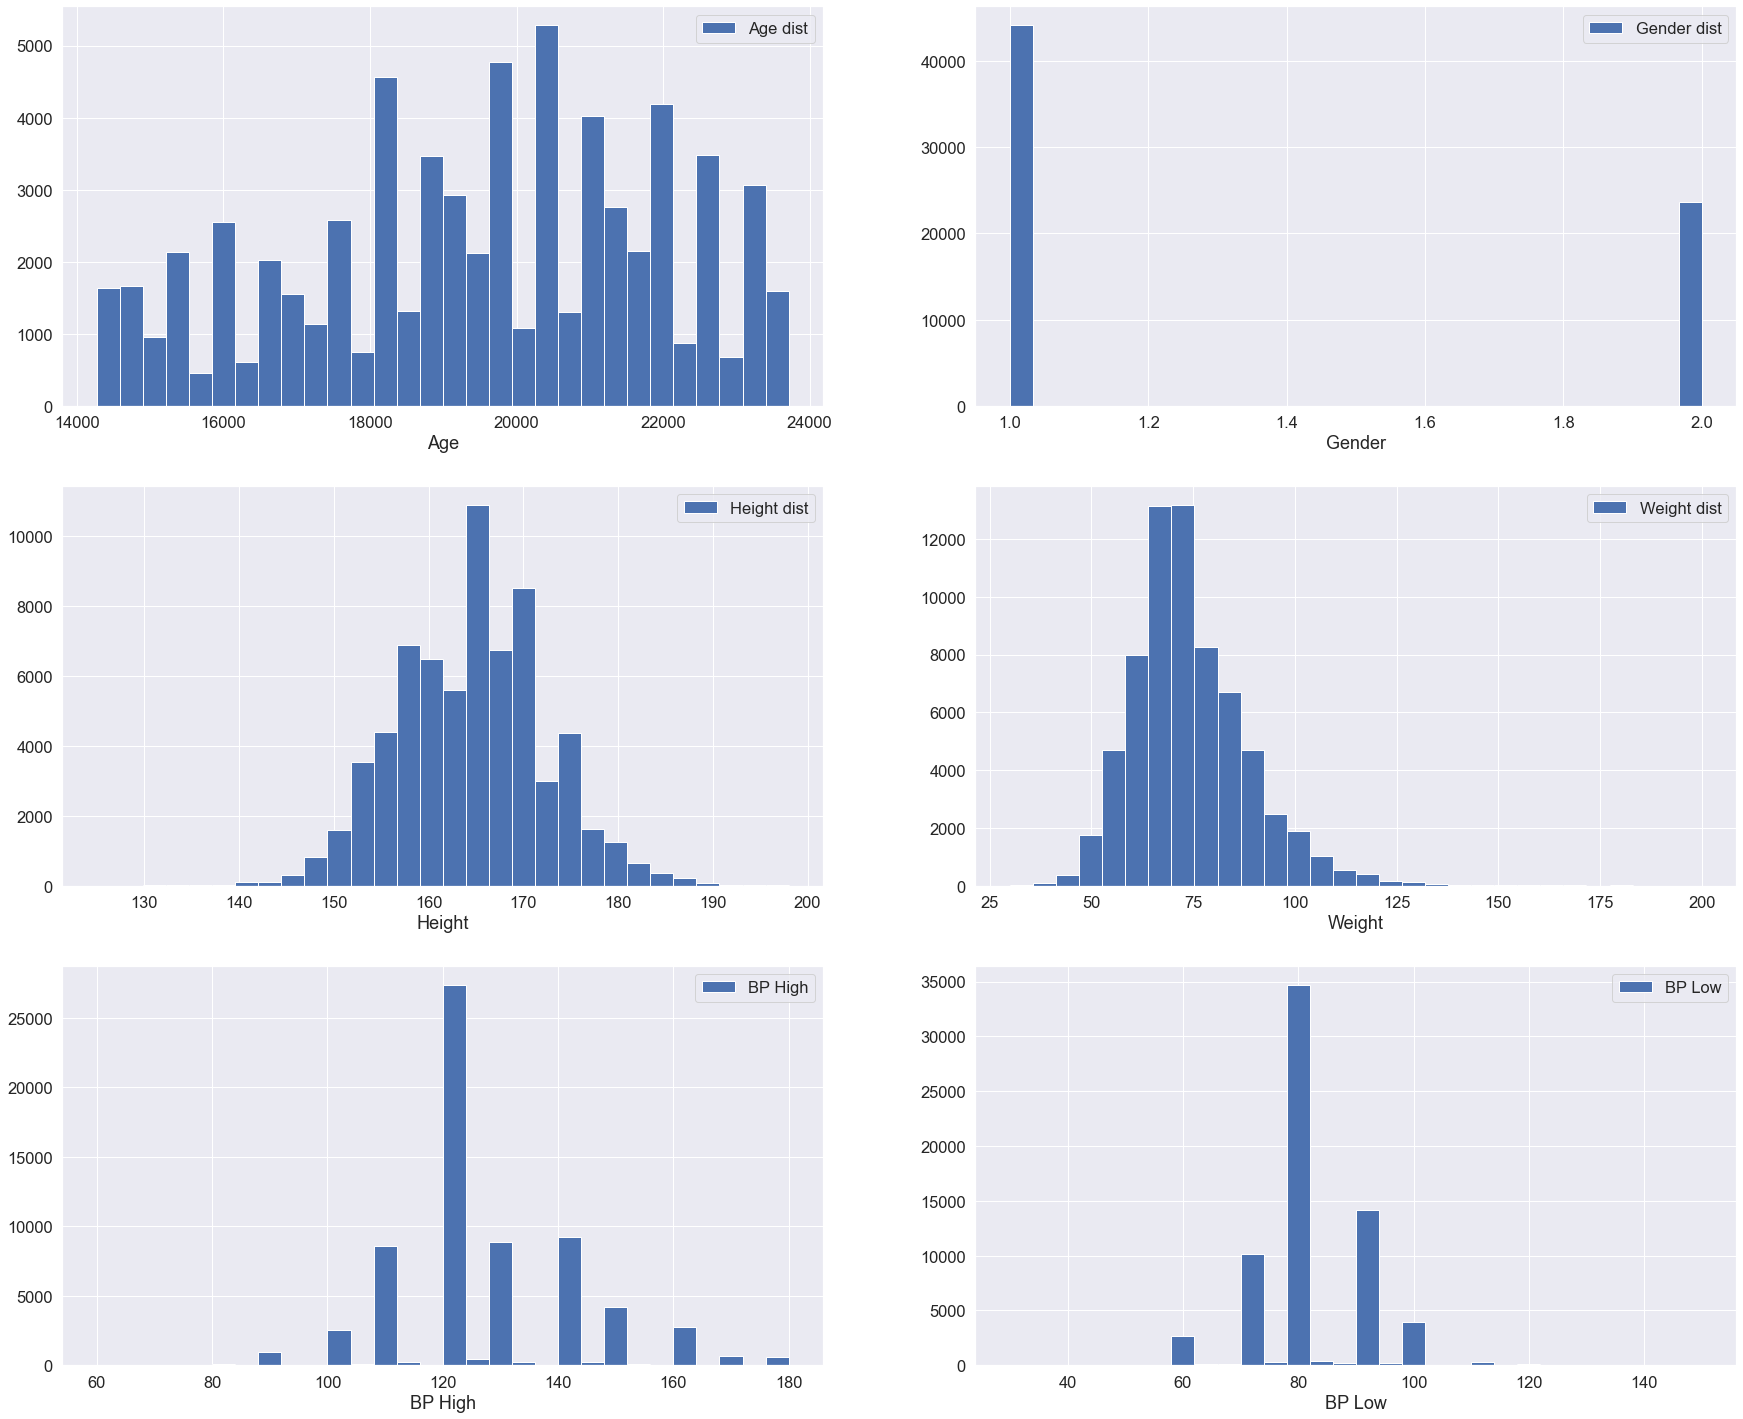

In [11]:
#Replot the same and see the distribution again
fig = plt.figure(figsize=(30,25))
sns.set(font_scale=1.5)

fig1 = fig.add_subplot(321)
plt.hist(df['age'],label='Age dist',bins=30)
plt.legend()
plt.xlabel('Age')

fig2 = fig.add_subplot(322)
plt.hist(df['gender'],label='Gender dist',bins=30)
plt.legend()
plt.xlabel('Gender')

fig3 = fig.add_subplot(323)
plt.hist(df['height'],label='Height dist',bins=30)
plt.legend()
plt.xlabel('Height')

fig4 = fig.add_subplot(324)
plt.hist(df['weight'],label='Weight dist',bins=30)
plt.legend()
plt.xlabel('Weight')

fig5 = fig.add_subplot(325)
plt.hist(df['ap_hi'],label='BP High',bins=30)
plt.legend()
plt.xlabel('BP High')

fig6 = fig.add_subplot(326)
plt.hist(df['ap_lo'],label='BP Low',bins=30)
plt.legend()
plt.xlabel('BP Low')


plt.show()

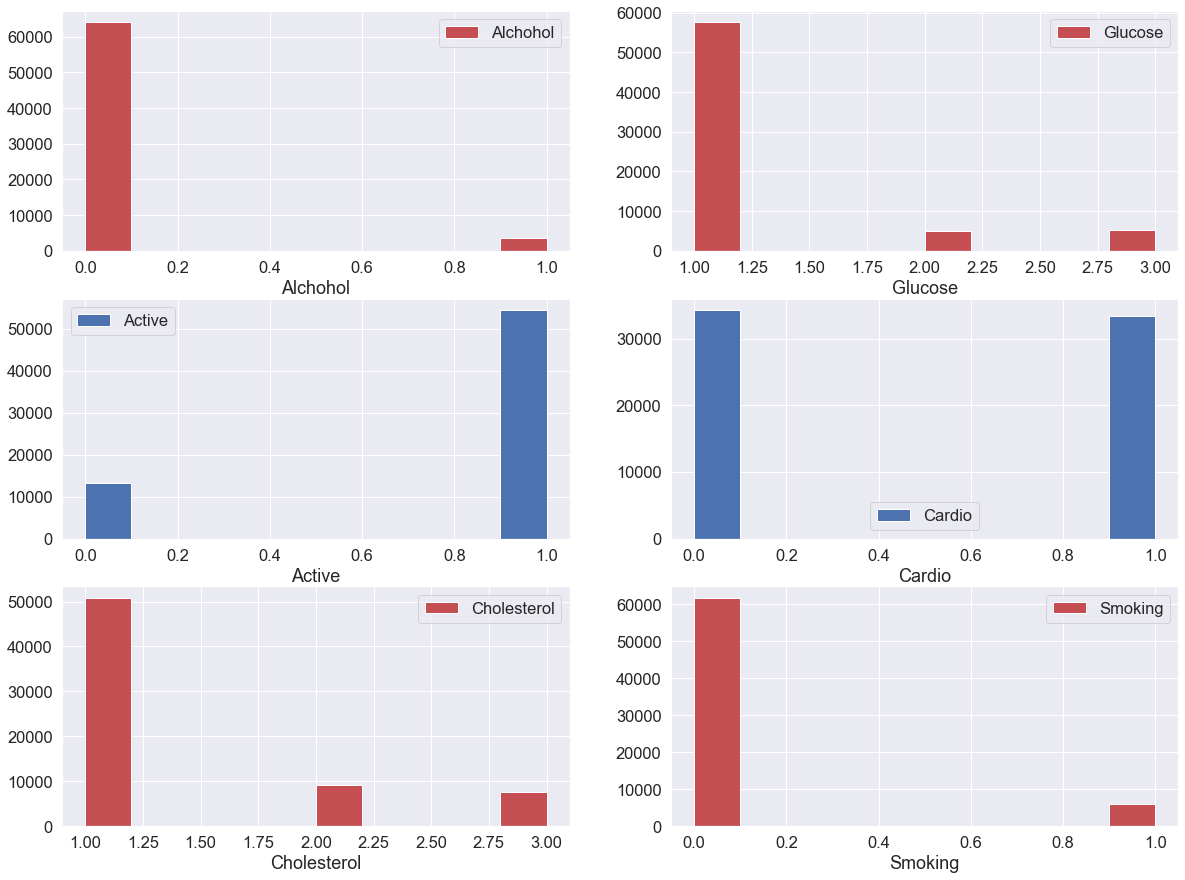

In [12]:
fig = plt.figure(figsize=(20,15))
sns.set(font_scale=1.5)

fig1 = fig.add_subplot(321)
plt.hist(df['alco'],label='Alchohol',color='r')
plt.legend()
plt.xlabel('Alchohol')

fig2 = fig.add_subplot(322)
plt.hist(df['gluc'],label='Glucose',color='r')
plt.legend()
plt.xlabel('Glucose')

fig3 = fig.add_subplot(323)
plt.hist(df['active'],label='Active')
plt.legend()
plt.xlabel('Active')

fig4 = fig.add_subplot(324)
plt.hist(df['cardio'],label='Cardio')
plt.legend()
plt.xlabel('Cardio')


fig5 = fig.add_subplot(325)
plt.hist(df['cholesterol'],label='Cholesterol',color='r')
plt.legend()
plt.xlabel('Cholesterol')


fig6 = fig.add_subplot(326)
plt.hist(df['smoke'],label='Smoking',color='r')
plt.legend()
plt.xlabel('Smoking')


plt.show()

In [13]:
df.shape

(67678, 12)

In [16]:
# Cannot make out much from the above plots. Lets build model
X = df.drop('cardio', axis=1)
y = df['cardio']

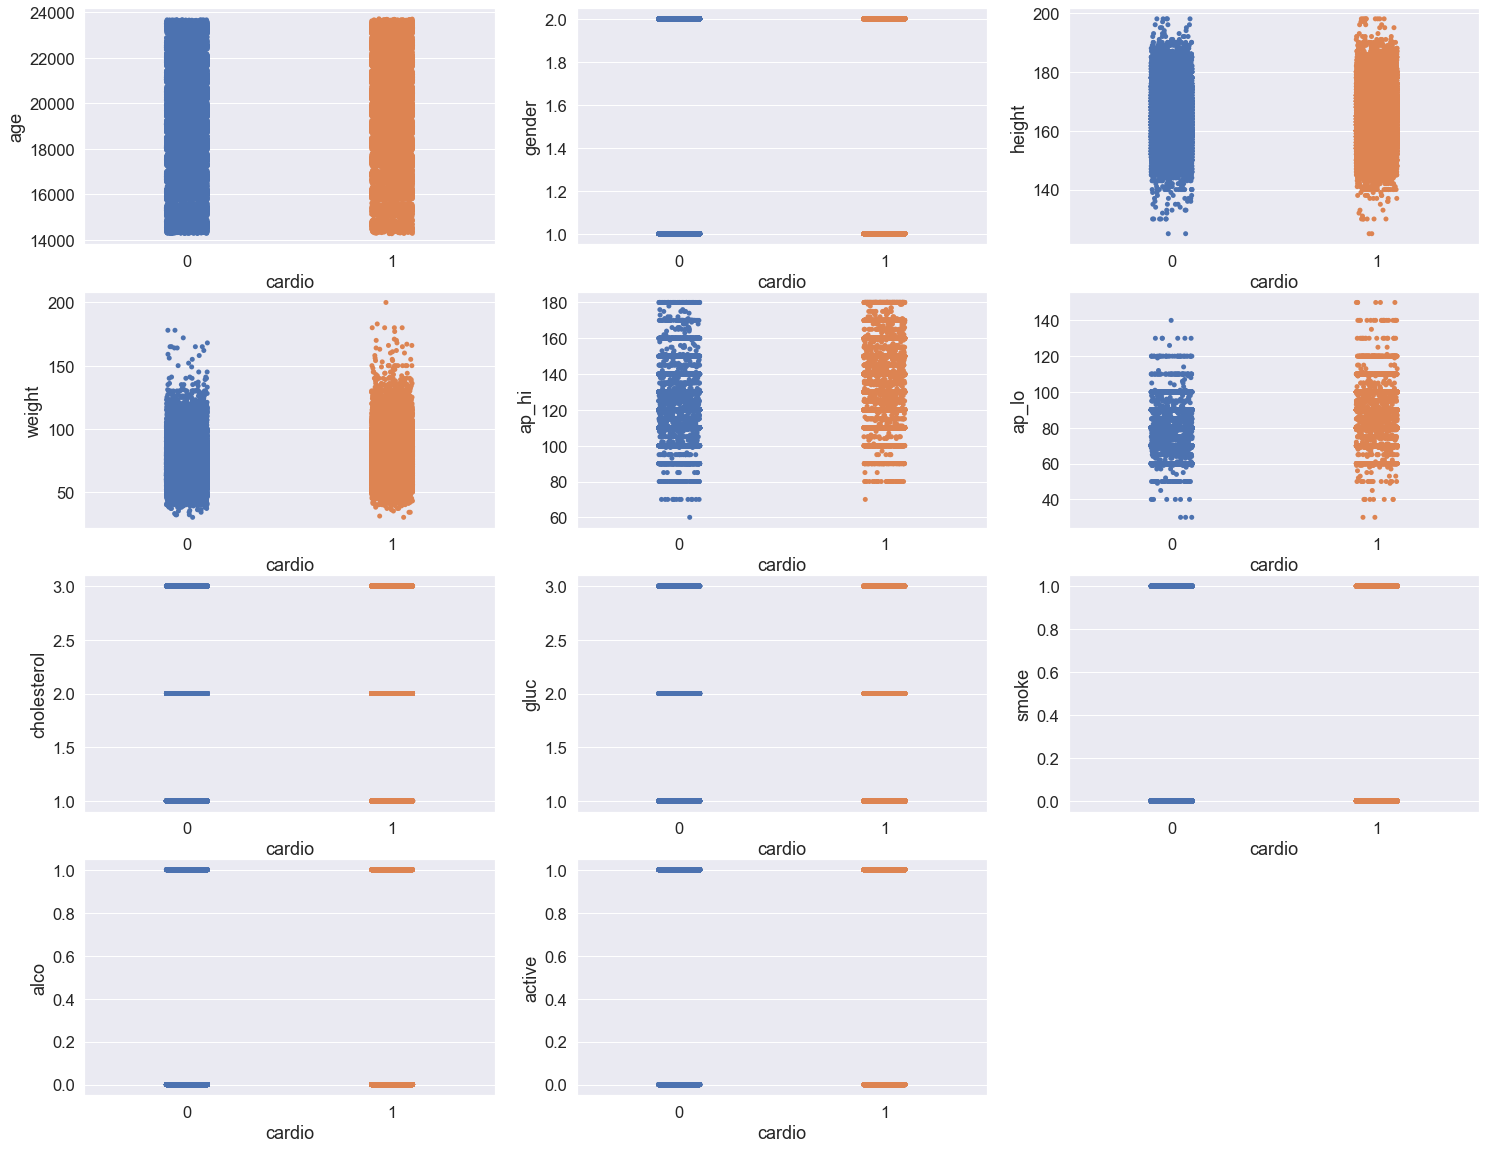

In [17]:
plt.figure(figsize=(25,20))
plot_n = 1

for col in df:
    if plot_n <= 11:
        ax = plt.subplot(4,3,plot_n)
        sns.stripplot(y,X[col])
    plot_n +=1
plt.show()

In [18]:
#multicollinearity - vif

#age,height,weight,ap_hi,ap_lo
X = df.iloc[:,[0,2,3,4,5]]

scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

vif=pd.DataFrame()
vif['score'] = [variance_inflation_factor(X_scaler,i) for i in range(X_scaler.shape[1])]
vif['feature'] = X.columns
vif

,score,feature
0,1.056800,age
1,1.123202,height
2,1.208037,weight
3,2.048641,ap_hi
4,1.978760,ap_lo


In [28]:
#Dont see multicollinearity

#backup (just in case)
df_test = df.copy()

#Encoding
gbl = globals()
_cols = df[['gender','active','alco','smoke','gluc']]

#Get dummies for above cols
for col in _cols:
    gbl['dummies_'+col] = pd.get_dummies(df[col],prefix=col)
    
#Concat
df = pd.concat([df,dummies_gender],axis=1)
df = pd.concat([df, dummies_active], axis=1)
df = pd.concat([df, dummies_alco], axis=1)
df = pd.concat([df, dummies_smoke], axis=1)
df = pd.concat([df, dummies_gluc], axis=1)

#Rename
df.rename(columns={'gender_1':'male','gender_2':'female'},inplace=True)
    

In [29]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,...,female,active_0,active_1,alco_0,alco_1,smoke_0,smoke_1,gluc_1,gluc_2,gluc_3
0,22469,1,155,69.0,130,80,2,2,0,0,...,0,0,1,1,0,1,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,...,0,0,1,1,0,1,0,1,0,0
2,21901,1,165,70.0,120,80,1,1,0,0,...,0,0,1,1,0,1,0,1,0,0
3,14549,2,165,85.0,120,80,1,1,1,1,...,1,0,1,0,1,0,1,1,0,0
4,23393,1,155,62.0,120,80,1,1,0,0,...,0,0,1,1,0,1,0,1,0,0


In [30]:
#Delete respective original columns
df.drop(columns=['gender','active','gluc','alco','smoke','gluc_3'],axis=1,inplace=True)
df.columns

Index(['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'cardio',
       'male', 'female', 'active_0', 'active_1', 'alco_0', 'alco_1', 'smoke_0',
       'smoke_1', 'gluc_1', 'gluc_2'],
      dtype='object')

In [31]:
lr = LogisticRegression()
X = df.drop('cardio',axis=1)
y = df['cardio']

In [32]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)
X_train,x_test,Y_train,y_test = train_test_split(X_scaler,y,test_size=0.25,random_state=41)
lr.fit(X_train,Y_train)
y_pred=lr.predict(x_test)
log_acc = accuracy_score(y_test,y_pred)

In [33]:
print ('Logistic Accuracy =>', log_acc)

Logistic Accuracy => 0.7240543735224586


In [34]:
log_conf_mat = confusion_matrix(y_test,y_pred)
print ('Logistic conf_mat ','\n', log_conf_mat)

Logistic conf_mat  
 [[6707 1922]
 [2747 5544]]


In [35]:
true_positive = log_conf_mat[0][0]
false_positive = log_conf_mat[0][1]
false_negative = log_conf_mat[1][0]
true_negative = log_conf_mat[1][1]

# Breaking down the formula for Accuracy
Log_Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
print ('Accuracy = > ', Log_Accuracy)

# Precison
Log_Precision = true_positive/(true_positive+false_positive)
print ('Precision = > ', Log_Precision)

# Recall
Log_Recall = true_positive/(true_positive+false_negative)
print ('Recall = > ', Log_Recall)

# F1 Score
Log_F1_Score = 2*(Log_Recall * Log_Precision) / (Log_Recall + Log_Precision)
print ('F1_Score = > ', Log_F1_Score)

Accuracy = >  0.7240543735224586
Precision = >  0.7772627187391354
Recall = >  0.7094351597207531
F1_Score = >  0.7418016921970911


In [36]:
# RandomForestClassifier
clf = RandomForestClassifier()
params = {'n_estimators':[13,15],
         'criterion':['entropy'],
         'max_depth':[10],
          'min_samples_split':[10,11],
          'min_samples_leaf':[5,6]
         }

grd = GridSearchCV(clf,param_grid=params)
grd.fit(X_train,Y_train)
print ('best_params = >', grd.best_params_)

clf = grd.best_estimator_
clf.fit(X_train,Y_train)
y_pred = clf.predict(x_test)


rf_conf_mat = confusion_matrix(y_test,y_pred)
print ('conf_mat = >','\n', rf_conf_mat)
print ('Accuracy rf Normal ======> ', accuracy_score(y_test,y_pred))

best_params = > {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 13}
conf_mat = > 
 [[6845 1784]
 [2765 5526]]
Accuracy rf Normal ======>  0.7311465721040189


In [37]:
# Confusion matrix score
true_positive = rf_conf_mat[0][0]
false_positive = rf_conf_mat[0][1]
false_negative = rf_conf_mat[1][0]
true_negative = rf_conf_mat[1][1]

# Breaking down the formula for Accuracy
rf_Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
print ('Accuracy_cm = > ', rf_Accuracy)

# Precison
rf_Precision = true_positive/(true_positive+false_positive)
print ('Precision = > ', rf_Precision)

# Recall
rf_Recall = true_positive/(true_positive+false_negative)
print ('Recall = > ', rf_Recall)

# F1 Score
rf_F1_Score = 2*(rf_Recall * rf_Precision) / (rf_Recall + rf_Precision)
print ('F1_Score = > ', rf_F1_Score)

Accuracy_cm = >  0.7311465721040189
Precision = >  0.793255301888979
Recall = >  0.7122788761706556
F1_Score = >  0.750589396348484


Text(0.5, 1.0, 'Log.Reg vs Rand.Forest')

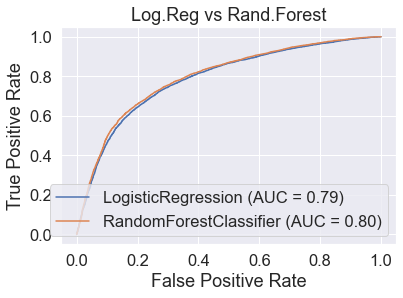

In [41]:
disp = plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(clf,x_test,y_test,ax=disp.ax_);
plt.title('Log.Reg vs Rand.Forest')

We did not see much improvement, but Random Forest can be choosen for the deployment.
- Note- There is a scope to improve the accuracy by tweaking preprocessing steps

In [42]:
# Plot ROC/AUC for multiple models without hyperparams tuning.

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

In [43]:
# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(random_state=1234), 
               GaussianNB(), 
               KNeighborsClassifier(), 
               DecisionTreeClassifier(random_state=1234),
               RandomForestClassifier(random_state=1234)]

In [44]:
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, Y_train)
    yproba = model.predict_proba(x_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

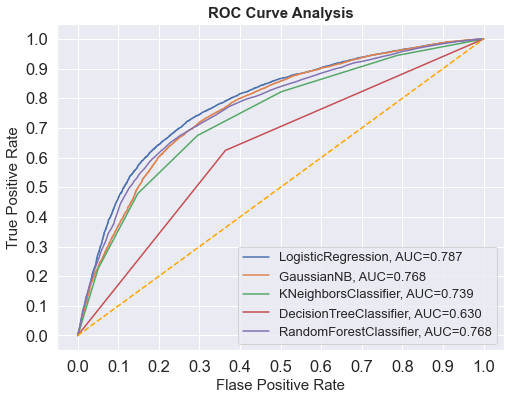

In [45]:
#Plot
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='b', linestyle='-')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()